# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amalapuram
Processing Record 2 of Set 1 | fort st. john
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | alpine
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | invercargill
Processing Record 7 of Set 1 | kapuskasing
Processing Record 8 of Set 1 | norderney
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | vadso
Processing Record 12 of Set 1 | isafjordur
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | barra do bugres
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | mahina
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | hasaki
Processing Record 19 of Set 1 | manavalakurichi
Processing Record 20 of Set 1 | isle of lewis
City not found. Skipping...
Processing Record 21 of Set 1 | w

City not found. Skipping...
Processing Record 39 of Set 4 | kecskemet
Processing Record 40 of Set 4 | richfield
Processing Record 41 of Set 4 | markovo
Processing Record 42 of Set 4 | otaru
Processing Record 43 of Set 4 | nushki
Processing Record 44 of Set 4 | qaqortoq
Processing Record 45 of Set 4 | harpswell center
Processing Record 46 of Set 4 | kapa'a
Processing Record 47 of Set 4 | labytnangi
Processing Record 48 of Set 4 | klyuchi
Processing Record 49 of Set 4 | korla
Processing Record 0 of Set 5 | maxixe
Processing Record 1 of Set 5 | reuleuet
Processing Record 2 of Set 5 | shantobe
Processing Record 3 of Set 5 | lihue
Processing Record 4 of Set 5 | port macquarie
Processing Record 5 of Set 5 | novodvinsk
Processing Record 6 of Set 5 | battagram
Processing Record 7 of Set 5 | novy bydzov
Processing Record 8 of Set 5 | gadzhiyevo
Processing Record 9 of Set 5 | oyama
Processing Record 10 of Set 5 | sumbe
Processing Record 11 of Set 5 | salinopolis
Processing Record 12 of Set 5 | m

City not found. Skipping...
Processing Record 30 of Set 8 | maamba
Processing Record 31 of Set 8 | katsuren-haebaru
Processing Record 32 of Set 8 | mount gambier
Processing Record 33 of Set 8 | palmer
Processing Record 34 of Set 8 | cafayate
Processing Record 35 of Set 8 | seryshevo
Processing Record 36 of Set 8 | san patricio
Processing Record 37 of Set 8 | huron
Processing Record 38 of Set 8 | tara
Processing Record 39 of Set 8 | hilo
Processing Record 40 of Set 8 | amahai
Processing Record 41 of Set 8 | panaba
Processing Record 42 of Set 8 | oneonta
Processing Record 43 of Set 8 | tangi
Processing Record 44 of Set 8 | sonsorol village
City not found. Skipping...
Processing Record 45 of Set 8 | nagqu
Processing Record 46 of Set 8 | huarmey
Processing Record 47 of Set 8 | salinas
Processing Record 48 of Set 8 | luganville
Processing Record 49 of Set 8 | aqaba
Processing Record 0 of Set 9 | mariehamn
Processing Record 1 of Set 9 | moanda
Processing Record 2 of Set 9 | tan-tan
Processin

Processing Record 18 of Set 12 | ghormach
Processing Record 19 of Set 12 | rapar
Processing Record 20 of Set 12 | krasnoslobodsk
Processing Record 21 of Set 12 | siem reap
Processing Record 22 of Set 12 | xindian
Processing Record 23 of Set 12 | rahimatpur
Processing Record 24 of Set 12 | princeville
Processing Record 25 of Set 12 | saudarkrokur
Processing Record 26 of Set 12 | mar del plata
Processing Record 27 of Set 12 | peace river
Processing Record 28 of Set 12 | lagoa
Processing Record 29 of Set 12 | tofol
Processing Record 30 of Set 12 | reggane
Processing Record 31 of Set 12 | taksimo
Processing Record 32 of Set 12 | starominskaya
Processing Record 33 of Set 12 | pechora
Processing Record 34 of Set 12 | la carlota
Processing Record 35 of Set 12 | antigo
Processing Record 36 of Set 12 | camacupa
Processing Record 37 of Set 12 | revda
Processing Record 38 of Set 12 | lebanon
Processing Record 39 of Set 12 | podporozh'ye
Processing Record 40 of Set 12 | bayan nur
City not found. S

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,amalapuram,16.5833,82.0167,25.35,92,100,3.96,IN,1690228189
1,fort st. john,56.2499,-120.8529,16.94,67,100,2.06,CA,1690228189
2,blackmans bay,-43.0167,147.3167,9.07,82,95,2.12,AU,1690228189
3,alpine,32.8350,-116.7664,38.49,43,0,3.09,US,1690228189
4,albany,42.6001,-73.9662,26.40,81,60,0.89,US,1690228051


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,amalapuram,16.5833,82.0167,25.35,92,100,3.96,IN,1690228189
1,fort st. john,56.2499,-120.8529,16.94,67,100,2.06,CA,1690228189
2,blackmans bay,-43.0167,147.3167,9.07,82,95,2.12,AU,1690228189
3,alpine,32.8350,-116.7664,38.49,43,0,3.09,US,1690228189
4,albany,42.6001,-73.9662,26.40,81,60,0.89,US,1690228051


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

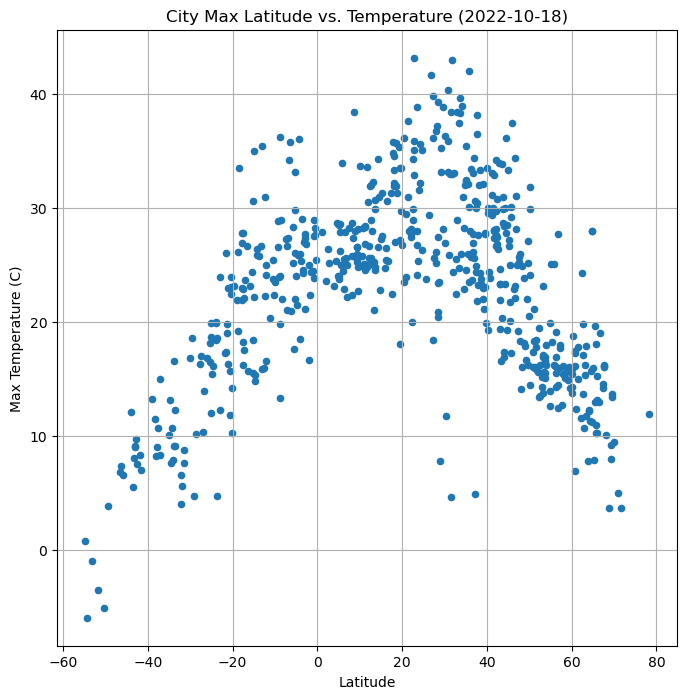

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', grid=True, figsize=(8,8),
                 title='City Max Latitude vs. Temperature (2022-10-18)')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

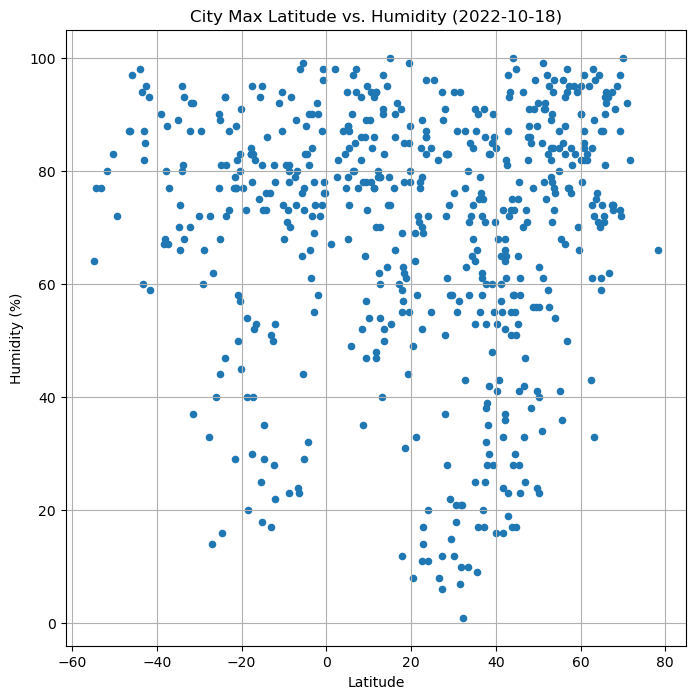

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', grid=True, figsize=(8,8),
                 title='City Max Latitude vs. Humidity (2022-10-18)')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

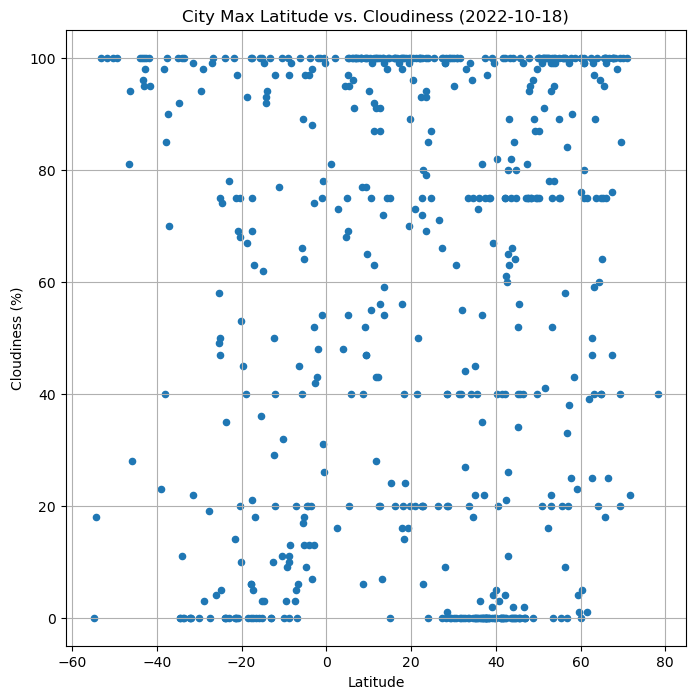

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', grid=True, figsize=(8,8),
                 title='City Max Latitude vs. Cloudiness (2022-10-18)')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

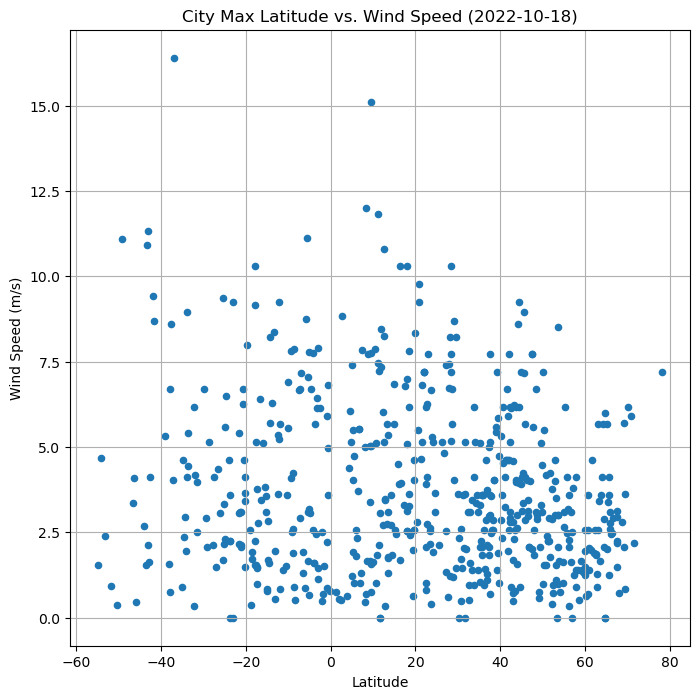

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', grid=True, figsize=(8,8),
                 title='City Max Latitude vs. Wind Speed (2022-10-18)')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linreg(x_values, y_values): 
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    plt.scatter(x_values, y_values)

    plt.plot(x_values, regress_values, color='r')

    plt.annotate(f"y={slope: .2f}x + {intercept: .2f}", (0,10), color='r')

    plt.show()
    print(f"The r-value is: {r_value}")

In [13]:
city_data_df.loc[city_data_df['Lat'] >= 0]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,amalapuram,16.5833,82.0167,25.35,92,100,3.96,IN,1690228189
1,fort st. john,56.2499,-120.8529,16.94,67,100,2.06,CA,1690228189
3,alpine,32.8350,-116.7664,38.49,43,0,3.09,US,1690228189
4,albany,42.6001,-73.9662,26.40,81,60,0.89,US,1690228051
6,kapuskasing,49.4169,-82.4331,22.05,56,75,2.06,CA,1690228189
...,...,...,...,...,...,...,...,...,...
577,oskarshamn,57.2645,16.4484,17.77,95,38,3.79,SE,1690228344
578,encrucijada,22.6169,-79.8711,34.31,52,75,6.17,CU,1690228344
580,kot sultan,30.7737,70.9313,33.17,55,100,1.72,PK,1690228345


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,amalapuram,16.5833,82.0167,25.35,92,100,3.96,IN,1690228189
1,fort st. john,56.2499,-120.8529,16.94,67,100,2.06,CA,1690228189
3,alpine,32.8350,-116.7664,38.49,43,0,3.09,US,1690228189
4,albany,42.6001,-73.9662,26.40,81,60,0.89,US,1690228051
6,kapuskasing,49.4169,-82.4331,22.05,56,75,2.06,CA,1690228189


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,blackmans bay,-43.0167,147.3167,9.07,82,95,2.12,AU,1690228189
5,invercargill,-46.4000,168.3500,7.35,87,94,4.08,NZ,1690228162
8,grytviken,-54.2811,-36.5092,-5.93,77,18,4.69,GS,1690228190
11,hermanus,-34.4187,19.2345,10.76,66,0,2.95,ZA,1690228190
12,barra do bugres,-15.0725,-57.1811,34.99,18,0,0.78,BR,1690228190


###  Temperature vs. Latitude Linear Regression Plot

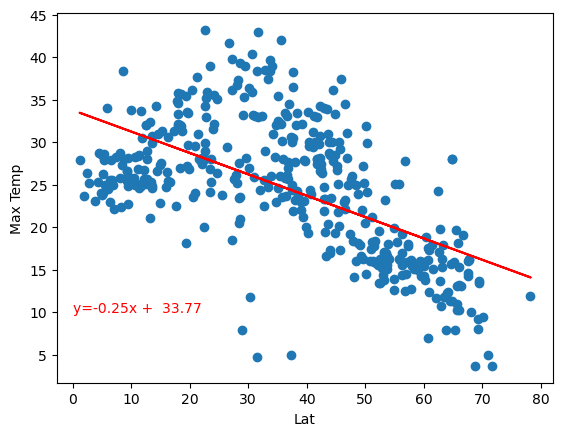

The r-value is: -0.5965828328466571


In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere_df['Lat'].values
y_values = northern_hemisphere_df['Max Temp'].values
plt.xlabel('Lat')
plt.ylabel('Max Temp')
linreg(x_values, y_values)

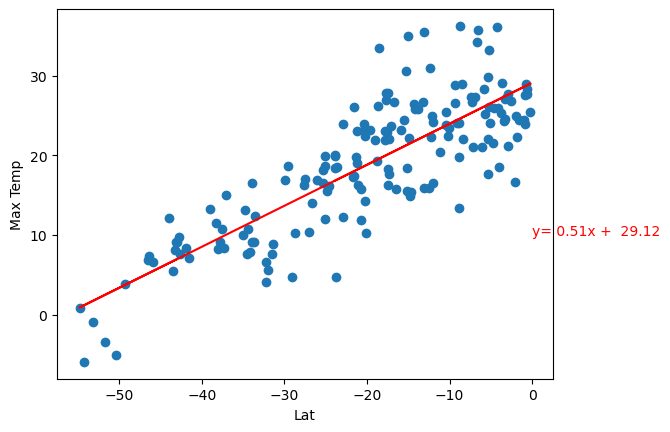

The r-value is: 0.8249539324578659


In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere_df['Lat'].values
y_values = southern_hemisphere_df['Max Temp'].values
plt.xlabel('Lat')
plt.ylabel('Max Temp')
linreg(x_values, y_values)

**Discussion about the linear relationship:** 
Looking at the northern hemisphere, as the latitude decreases, the maximum temperature decreases. The reverse is true in the southern hemisphere, where as the latitude increases, the max temperature increases. There is a direct coorelation to where a country is and what the temperature will be. Overall, the more negative the latitude the colder the temperature will be in the southern hemisphere versus the more negative the latitude the warmer the temperature will be in the northern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

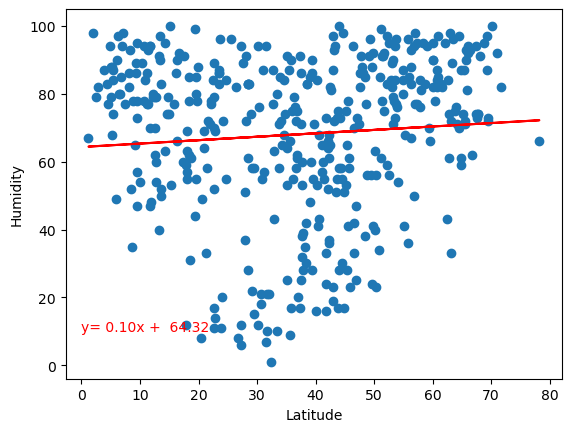

The r-value is: 0.07877767027134626


In [18]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat'].values
y_values = northern_hemisphere_df['Humidity'].values
plt.xlabel('Latitude')
plt.ylabel('Humidity')
linreg(x_values, y_values)

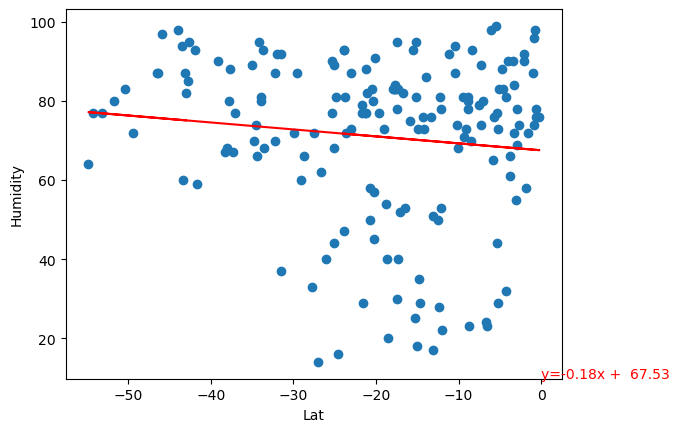

The r-value is: -0.11630701401927027


In [19]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat'].values
y_values = southern_hemisphere_df['Humidity'].values
plt.xlabel('Lat')
plt.ylabel('Humidity')
linreg(x_values, y_values)

**Discussion about the linear relationship:**
With the data presented, there does not seem to be a positive or negative correlation between humidity and latitude between the two hemispheres. Both have plenty of outliers outside of the line of regression, so this data is unable to give us any correlation between the two. 

### Cloudiness vs. Latitude Linear Regression Plot

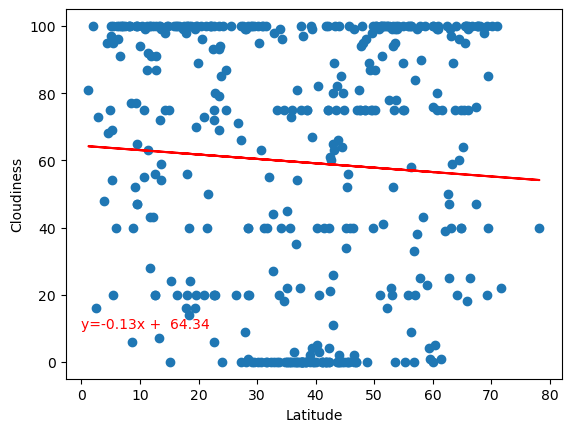

The r-value is: -0.06261933324478021


In [20]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat'].values
y_values = northern_hemisphere_df['Cloudiness'].values
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
linreg(x_values, y_values)

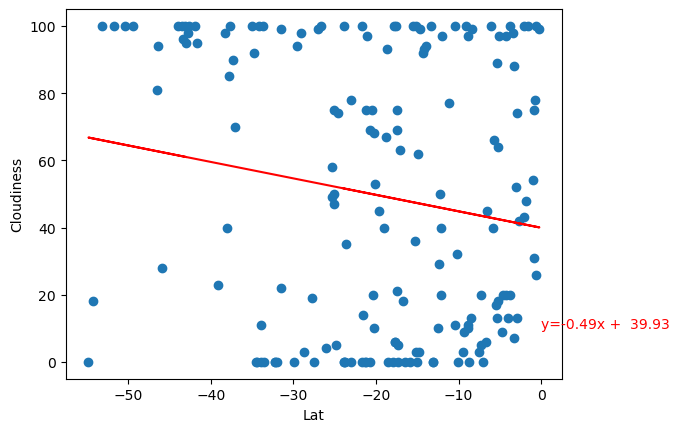

The r-value is: -0.1673587785426689


In [21]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat'].values
y_values = southern_hemisphere_df['Cloudiness'].values
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
linreg(x_values, y_values)

**Discussion about the linear relationship:**
Again, with the data presented there is no correlation between more/less clouds and the different latitudes. 

### Wind Speed vs. Latitude Linear Regression Plot

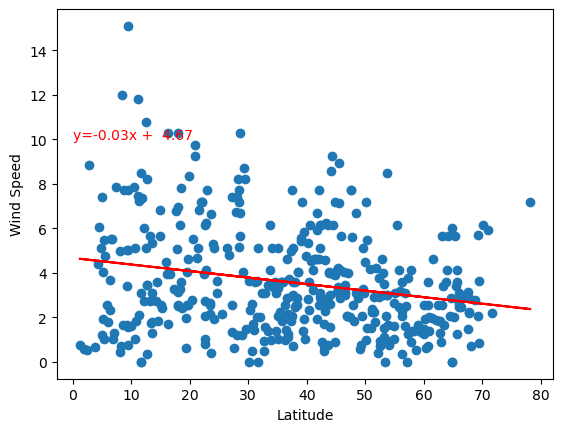

The r-value is: -0.22692565822074695


In [22]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat'].values
y_values = northern_hemisphere_df['Wind Speed'].values
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
linreg(x_values, y_values)

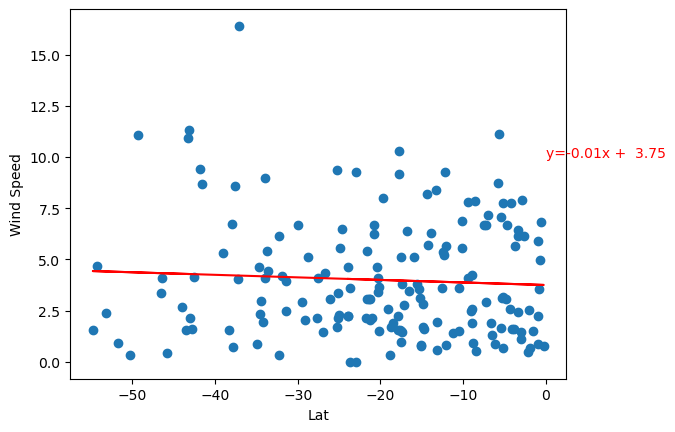

The r-value is: -0.05923358758611528


In [23]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat'].values
y_values = southern_hemisphere_df['Wind Speed'].values
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
linreg(x_values, y_values)

**Discussion about the linear relationship:** 
It is not a strong positive correlation, but a small one between more positive latitude and higher wind speeds in the southern hemisphere. The reverse is true in the northern hemisphere, where the more positive latitude, the lower the wind speeds. This is not a strong correlation. 